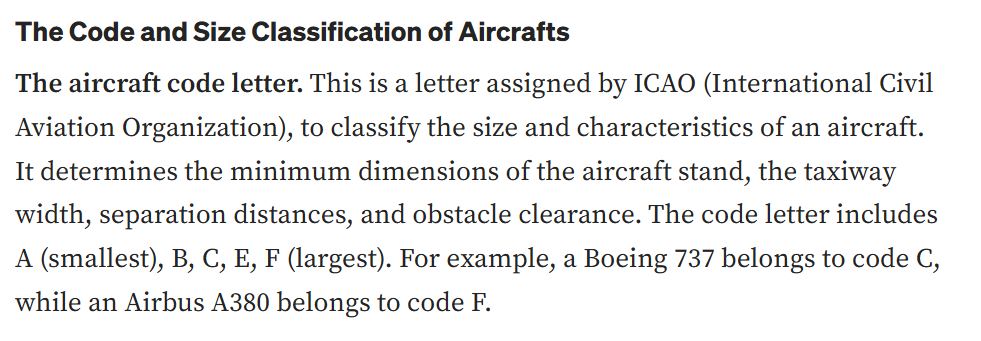

https://medium.com/@muhsulthoan/the-easiest-way-to-identify-aircraft-types-6ead8de7bc3b

### Import dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_cleaned_drop_IF = pd.read_csv('./Data/cleaned_drop_IF.csv')
df_cleaned_drop_IQR = pd.read_csv('./Data/cleaned_drop_IQR.csv')
df_cleaned_mean_IF = pd.read_csv('./Data/cleaned_mean_IF.csv')
df_cleaned_mean_IQR = pd.read_csv('./Data/cleaned_mean_IQR.csv')
df_cleaned_median_IF = pd.read_csv('./Data/cleaned_median_IF.csv')
df_cleaned_median_IQR = pd.read_csv('./Data/cleaned_median_IQR.csv')

In [3]:
df_cleaned_drop_IF.columns

Index(['from_airport_code', 'from_country', 'dest_airport_code',
       'dest_country', 'aircraft_type', 'airline_number', 'airline_name',
       'flight_number', 'departure_time', 'arrival_time', 'duration', 'stops',
       'price', 'currency', 'co2_emissions', 'avg_co2_emission_for_this_route',
       'co2_percentage', 'scan_date'],
      dtype='object')

In [4]:
# df_cleaned_drop_IF.head(3)
print(df_cleaned_drop_IF.head(1))

  from_airport_code from_country dest_airport_code dest_country  \
0               YYZ       Canada               ADD     Ethiopia   

                                      aircraft_type airline_number  \
0  Airbus A220-300 Passenger|Boeing 777|Airbus A350          multi   

              airline_name      flight_number       departure_time  \
0  [Air Canada| Ethiopian]  AC418|AC418|AC418  2022-05-02 16:00:00   

          arrival_time  duration  stops  price currency  co2_emissions  \
0  2022-05-04 06:00:00      1860      2  820.0      USD      1089000.0   

   avg_co2_emission_for_this_route  co2_percentage            scan_date  
0                        1126000.0            -3.0  2022-04-29 17:52:59  


### Find the most flight that aircraft usually fly which is Germany	-> USA stop 1,2

In [5]:
group = df_cleaned_drop_IF.groupby(['from_country', 'dest_country'])[['from_airport_code']].count()

group = group.reset_index()
group[group['from_airport_code'] > 2000]


from_country   dest_country  from_airport_code
102    Australia  United States               2199
234       Brazil  United States               2344
636      Germany  United States               2468

In [6]:
group = df_cleaned_drop_IF.groupby(['from_country', 'dest_country', 'stops'])[['from_airport_code']].count()

group = group.reset_index()
group[group['from_airport_code'] > 1000].sort_values(by='from_airport_code', ascending=False)

from_country   dest_country  stops  from_airport_code
247     Australia  United States      2               1681
581        Brazil  United States      2               1519
1567      Germany  United States      1               1352
1568      Germany  United States      2               1088
898         China  United States      2               1077
702        Canada  United States      1               1040

### Use criteria is mean of path

In [7]:
mask_stop1_ga = ((df_cleaned_drop_IF['from_country'] == 'Germany') & (df_cleaned_drop_IF['dest_country'] == 'United States') & (df_cleaned_drop_IF['stops'] == 1))
mask_stop2_ga = ((df_cleaned_drop_IF['from_country'] == 'Germany') & (df_cleaned_drop_IF['dest_country'] == 'United States') & (df_cleaned_drop_IF['stops'] == 2))
df_ga_stop1 = df_cleaned_drop_IF[mask_stop1_ga]
df_ga_stop2 = df_cleaned_drop_IF[mask_stop2_ga]
mean_ga_stop1 = df_ga_stop1['avg_co2_emission_for_this_route'].mean()
mean_ga_stop2 = df_ga_stop2['avg_co2_emission_for_this_route'].mean()

mean_ga_stop1, mean_ga_stop2

(848374.2603550296, 865450.3676470588)

In [8]:
mean_ga_stop1 = df_ga_stop1['co2_emissions'].mean()
mean_ga_stop2 = df_ga_stop2['co2_emissions'].mean()

mean_ga_stop1, mean_ga_stop2

(904980.0295857989, 964973.3455882353)

In [9]:
mean_ga_stop1 = df_ga_stop1['co2_percentage'].mean()
mean_ga_stop2 = df_ga_stop2['co2_percentage'].mean()

mean_ga_stop1, mean_ga_stop2

(7.159763313609467, 11.853860294117647)

In [10]:
def label_co2(value, mean_value):
    return 'below' if value < mean_value else 'above'

# Apply the function to create a new 'label' column
df_ga_stop1['label'] = df_ga_stop1['co2_percentage'].apply(lambda x: label_co2(x, mean_ga_stop1))
df_ga_stop2['label'] = df_ga_stop2['co2_percentage'].apply(lambda x: label_co2(x, mean_ga_stop2))

C:\Users\punna\AppData\Local\Temp\ipykernel_10400\2078168040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ga_stop1['label'] = df_ga_stop1['co2_percentage'].apply(lambda x: label_co2(x, mean_ga_stop1))
C:\Users\punna\AppData\Local\Temp\ipykernel_10400\2078168040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ga_stop2['label'] = df_ga_stop2['co2_percentage'].apply(lambda x: label_co2(x, mean_ga_stop2))


### Use criteria is co2_percentage

In [11]:
def label_co2(value):
    return 'below' if value < 0 else 'above'

# Apply the function to create a new 'label' column
df_ga_stop1['label percent'] = df_ga_stop1['co2_percentage'].apply(lambda x: label_co2(x))
df_ga_stop2['label percent'] = df_ga_stop2['co2_percentage'].apply(lambda x: label_co2(x))

C:\Users\punna\AppData\Local\Temp\ipykernel_10400\1743252163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ga_stop1['label percent'] = df_ga_stop1['co2_percentage'].apply(lambda x: label_co2(x))
C:\Users\punna\AppData\Local\Temp\ipykernel_10400\1743252163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ga_stop2['label percent'] = df_ga_stop2['co2_percentage'].apply(lambda x: label_co2(x))


### Check the side of data is equally for not biased training

In [12]:
df_ga_stop1.groupby(['label'])[['co2_percentage']].count()

co2_percentage
label                
above             561
below             791

In [13]:
df_ga_stop1.groupby(['label percent'])[['co2_percentage']].count()

co2_percentage
label percent                
above                     861
below                     491

In [14]:
df_ga_stop2.groupby(['label'])[['co2_percentage']].count()

co2_percentage
label                
above             517
below             571

In [15]:
df_ga_stop2.groupby(['label percent'])[['co2_percentage']].count()

co2_percentage
label percent                
above                     841
below                     247

In [16]:
print(df_ga_stop1.head(1))

     from_airport_code from_country dest_airport_code   dest_country  \
3736               FRA      Germany               JFK  United States   

               aircraft_type airline_number  airline_name  flight_number  \
3736  Embraer 170|Boeing 777             AF  [Air France]  AF1519|AF1519   

           departure_time         arrival_time  duration  stops   price  \
3736  2022-05-03 09:40:00  2022-05-03 16:55:00       795      1  1717.0   

     currency  co2_emissions  avg_co2_emission_for_this_route  co2_percentage  \
3736      USD      1086000.0                         656000.0            65.0   

                scan_date  label label percent  
3736  2022-04-29 17:52:59  above         above  


In [17]:
import pandas as pd

# # Example row (assuming this is part of your DataFrame)
# df_ga_stop1 = pd.DataFrame({
#     'aircraft_type': ['Embraer 170|Boeing 777']
# })

# Step 1: Split the aircraft types
df_ga_stop1[['aircraft_type_stop_1', 'aircraft_type_stop_2']] = df_ga_stop1['aircraft_type'].str.split('|', expand=True)

# Step 2: Function to convert first letter to number
def aircraft_type_to_number(aircraft_type):
    if pd.isnull(aircraft_type) or len(aircraft_type) == 0:
        return None
    first_letter = aircraft_type[0].upper()
    if 'A' <= first_letter <= 'F':
        return ord(first_letter) - ord('A')
    else:
        return None  # or some default like -1

# Step 3: Apply the conversion
df_ga_stop1['aircraft_type_stop_1_code'] = df_ga_stop1['aircraft_type_stop_1'].apply(aircraft_type_to_number)
df_ga_stop1['aircraft_type_stop_2_code'] = df_ga_stop1['aircraft_type_stop_2'].apply(aircraft_type_to_number)


C:\Users\punna\AppData\Local\Temp\ipykernel_10400\2724867986.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ga_stop1[['aircraft_type_stop_1', 'aircraft_type_stop_2']] = df_ga_stop1['aircraft_type'].str.split('|', expand=True)
C:\Users\punna\AppData\Local\Temp\ipykernel_10400\2724867986.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ga_stop1[['aircraft_type_stop_1', 'aircraft_type_stop_2']] = df_ga_stop1['aircraft_type'].str.split('|', expand=True)
C:\Users\punna\AppData\Local\Temp\ipykernel_

### Graph Visualization

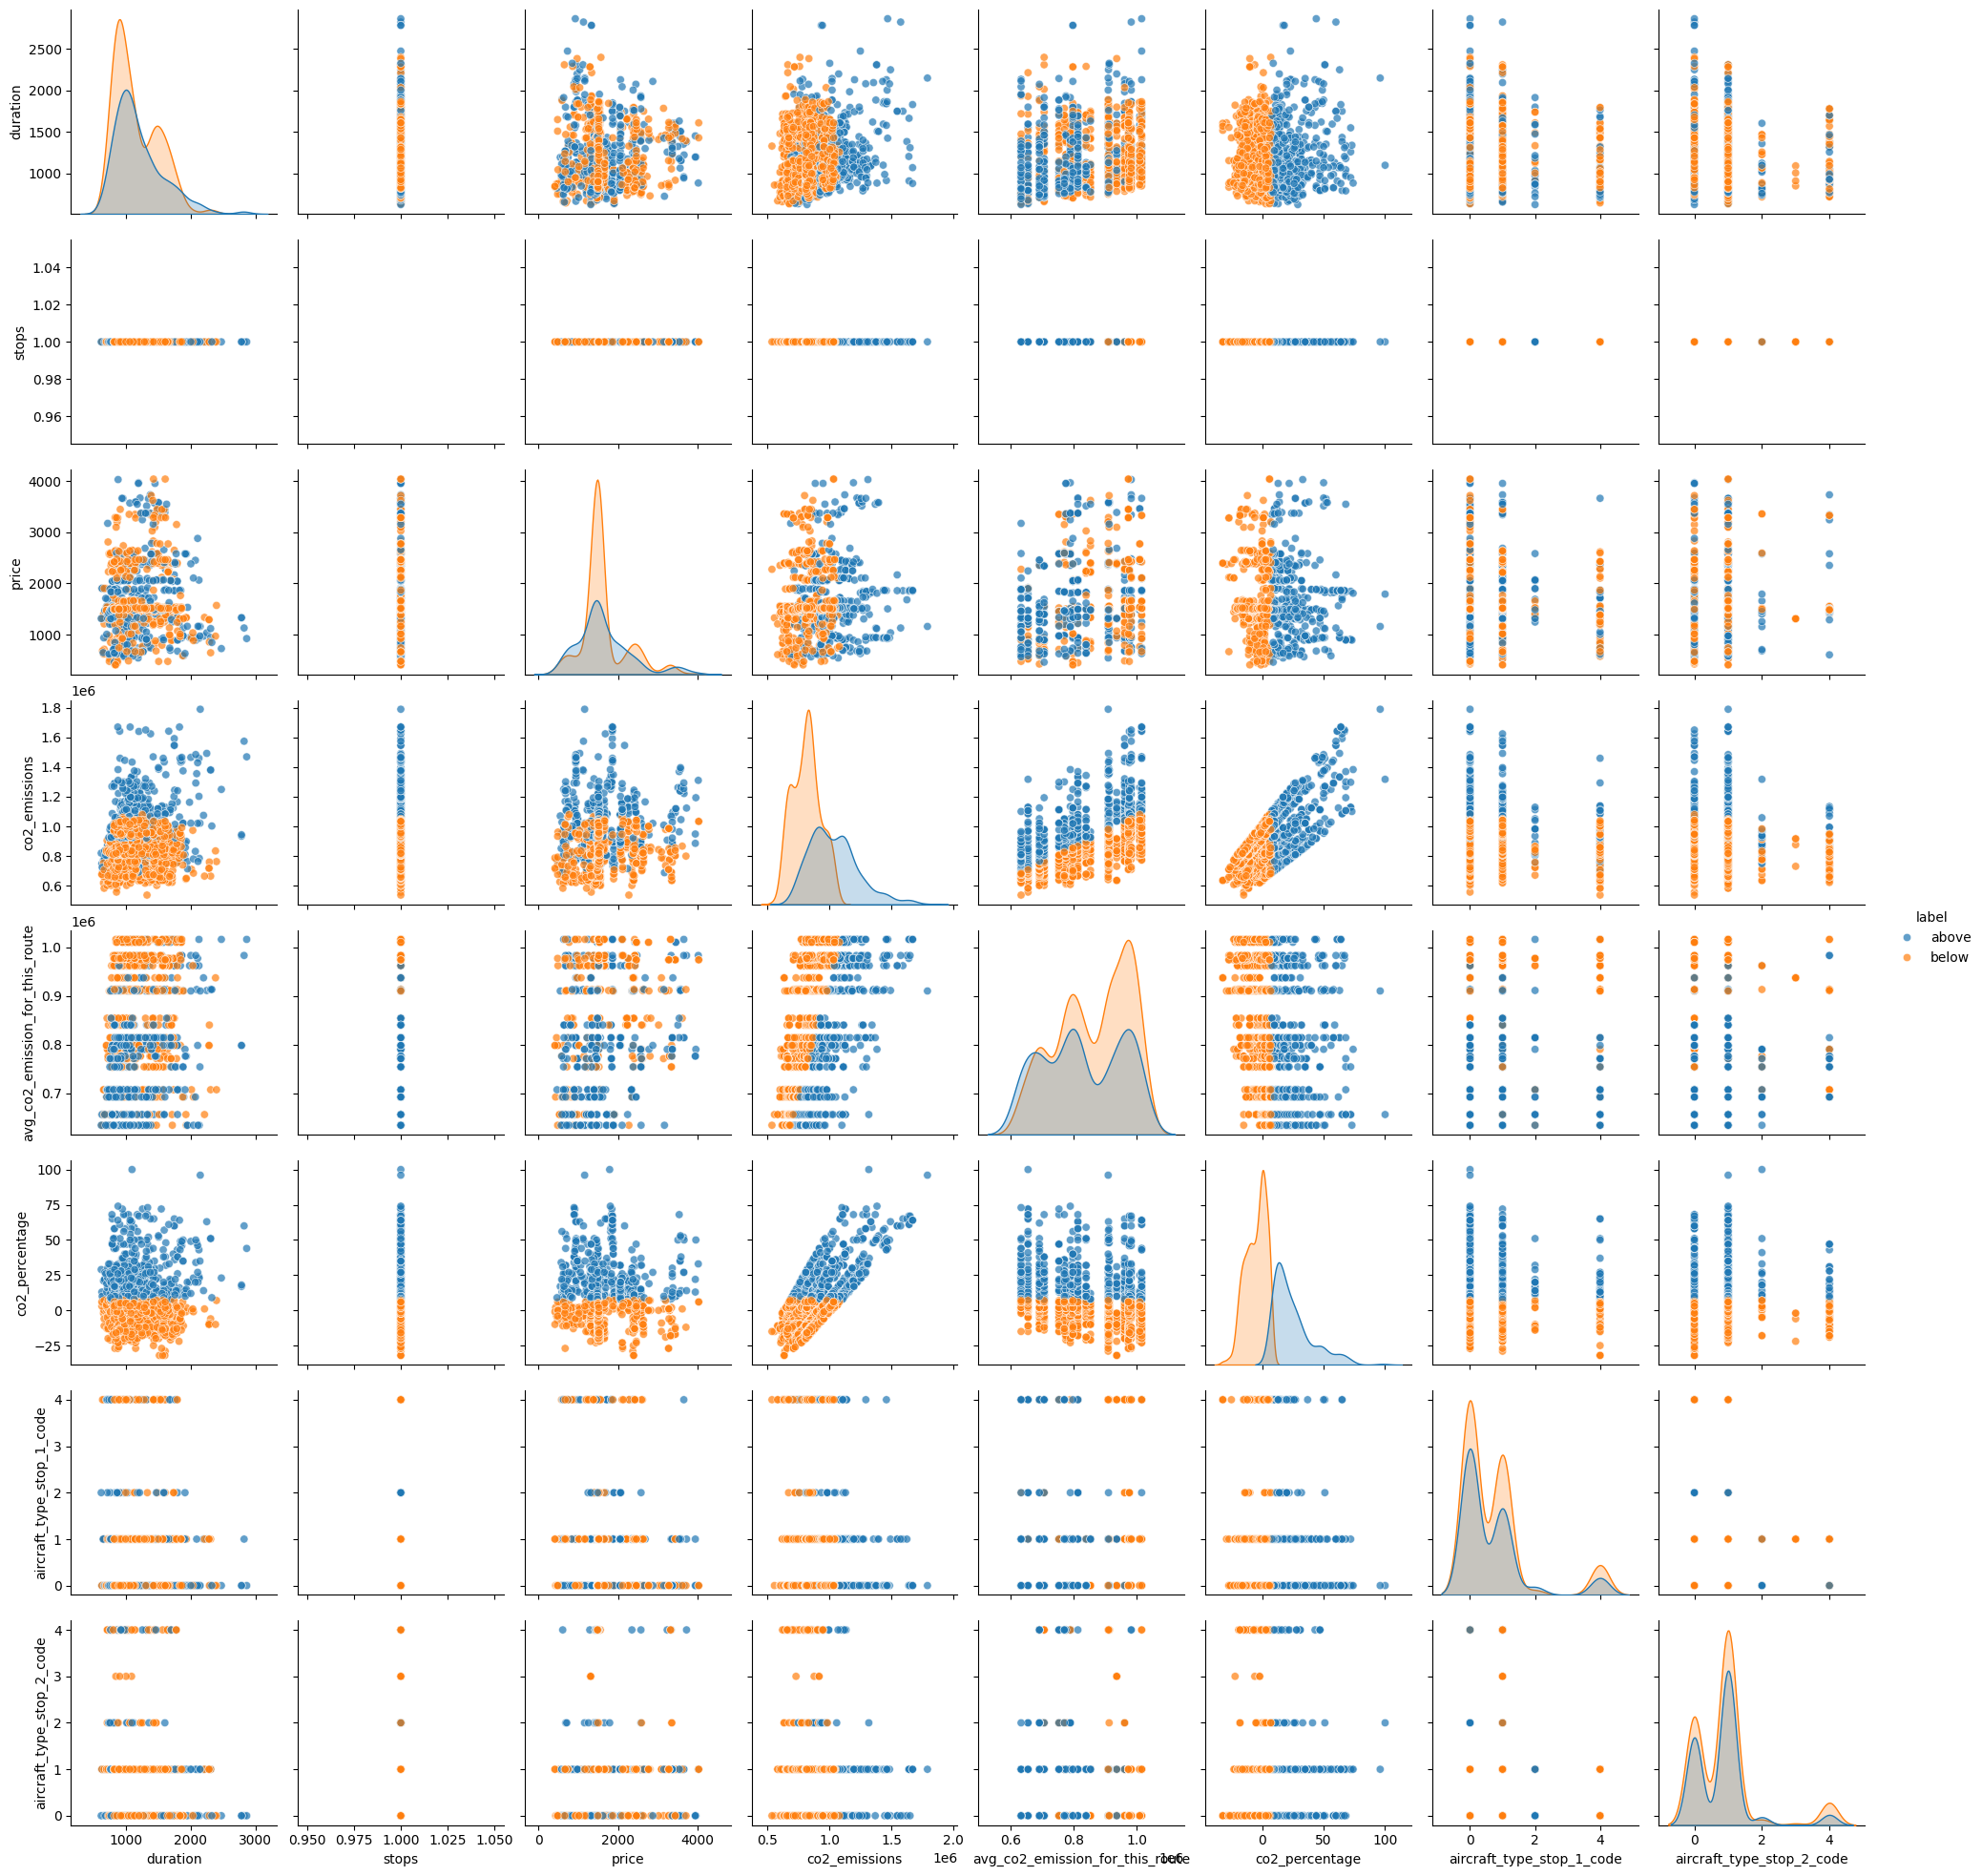

In [18]:

import seaborn as sns

features = ['duration', 'stops', 'price', 'co2_emissions', 'avg_co2_emission_for_this_route', 'co2_percentage',    
            'aircraft_type_stop_1_code', 'aircraft_type_stop_2_code']

sns.pairplot(
    df_ga_stop1,
    vars=features,
                 hue='label',
    #              markers=['o', 'D', '+'],
    plot_kws={"alpha": 0.7},
);

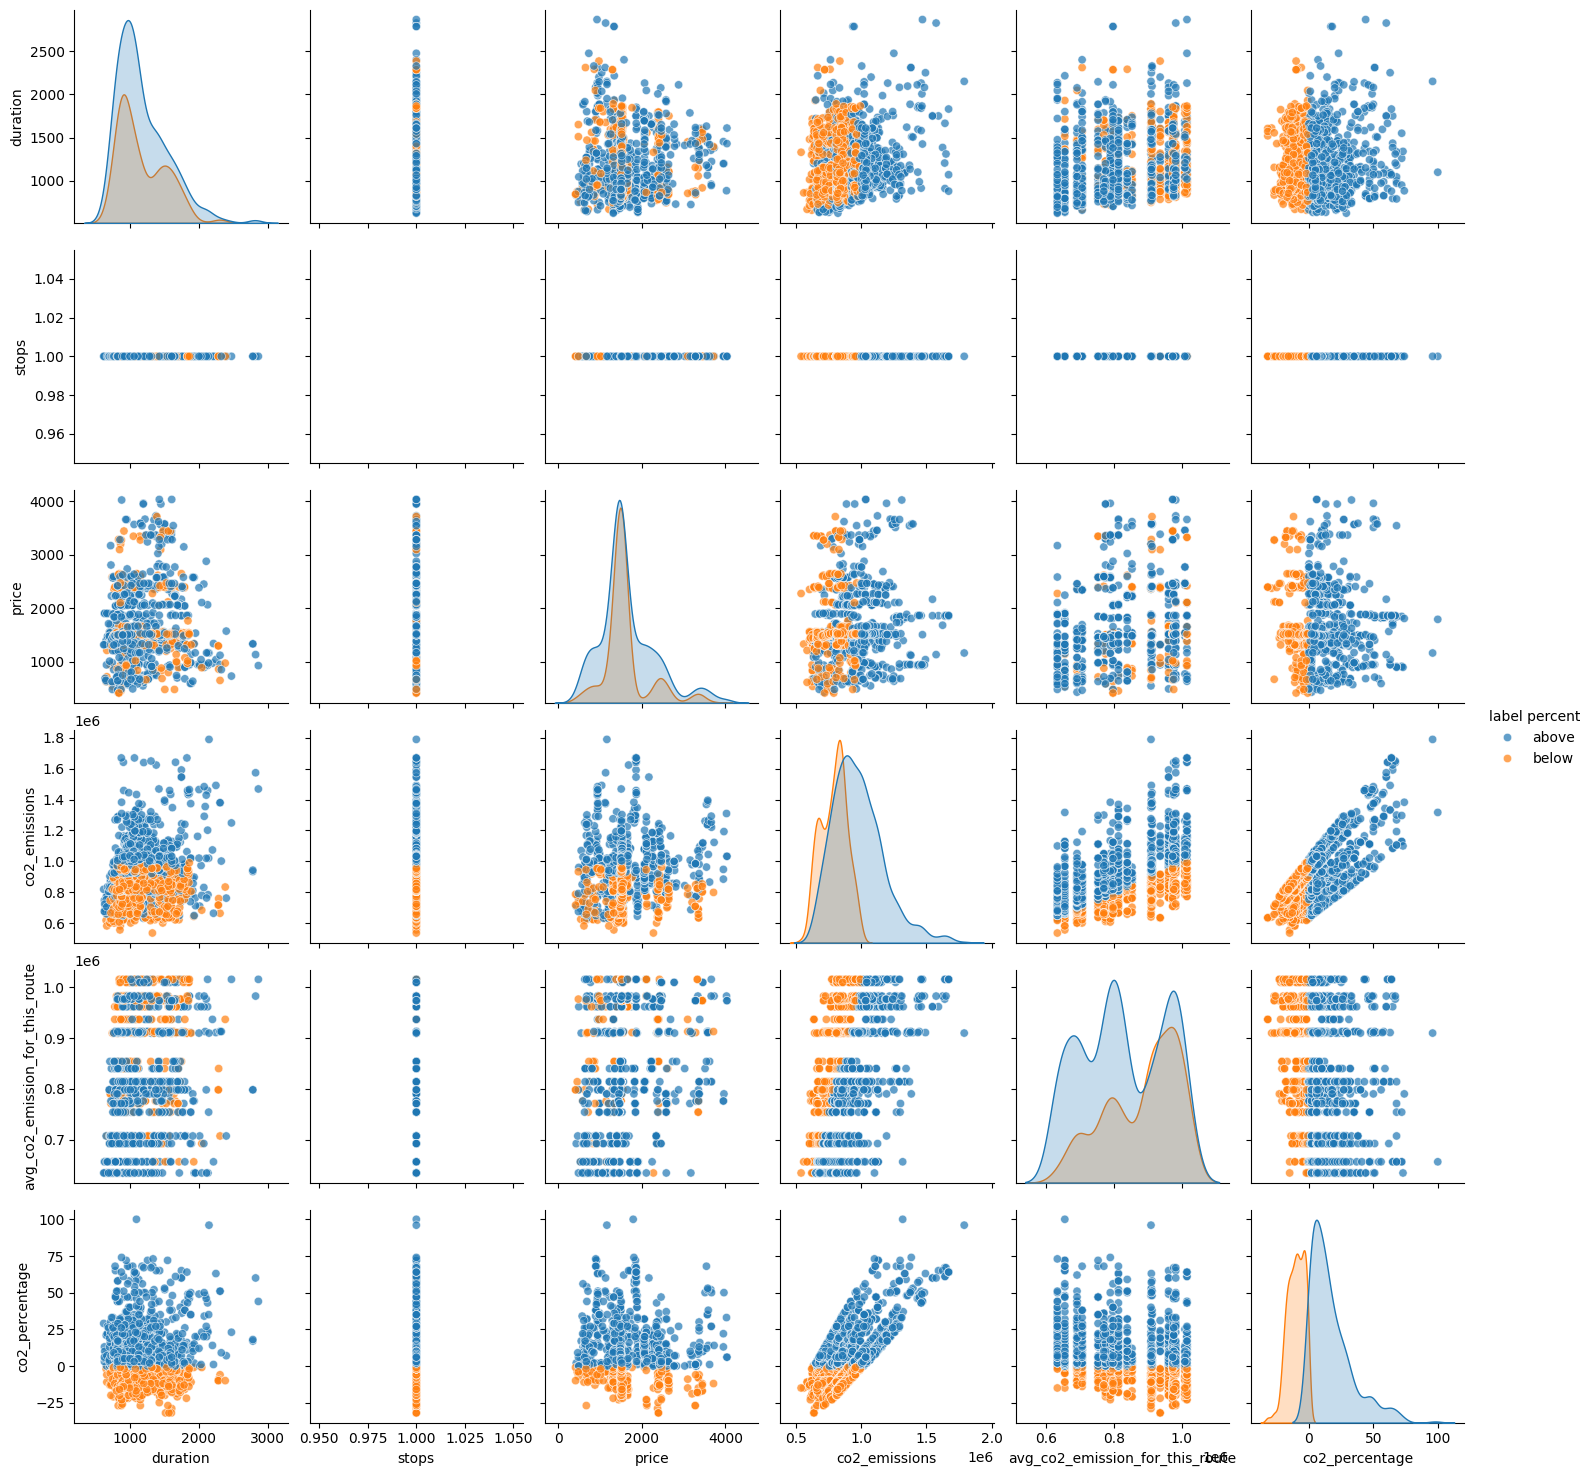

In [19]:

import seaborn as sns

features = ['duration', 'stops', 'price', 'co2_emissions', 'avg_co2_emission_for_this_route', 'co2_percentage']

sns.pairplot(
    df_ga_stop1,
    vars=features,
                 hue='label percent',
    #              markers=['o', 'D', '+'],
    plot_kws={"alpha": 0.7},
);

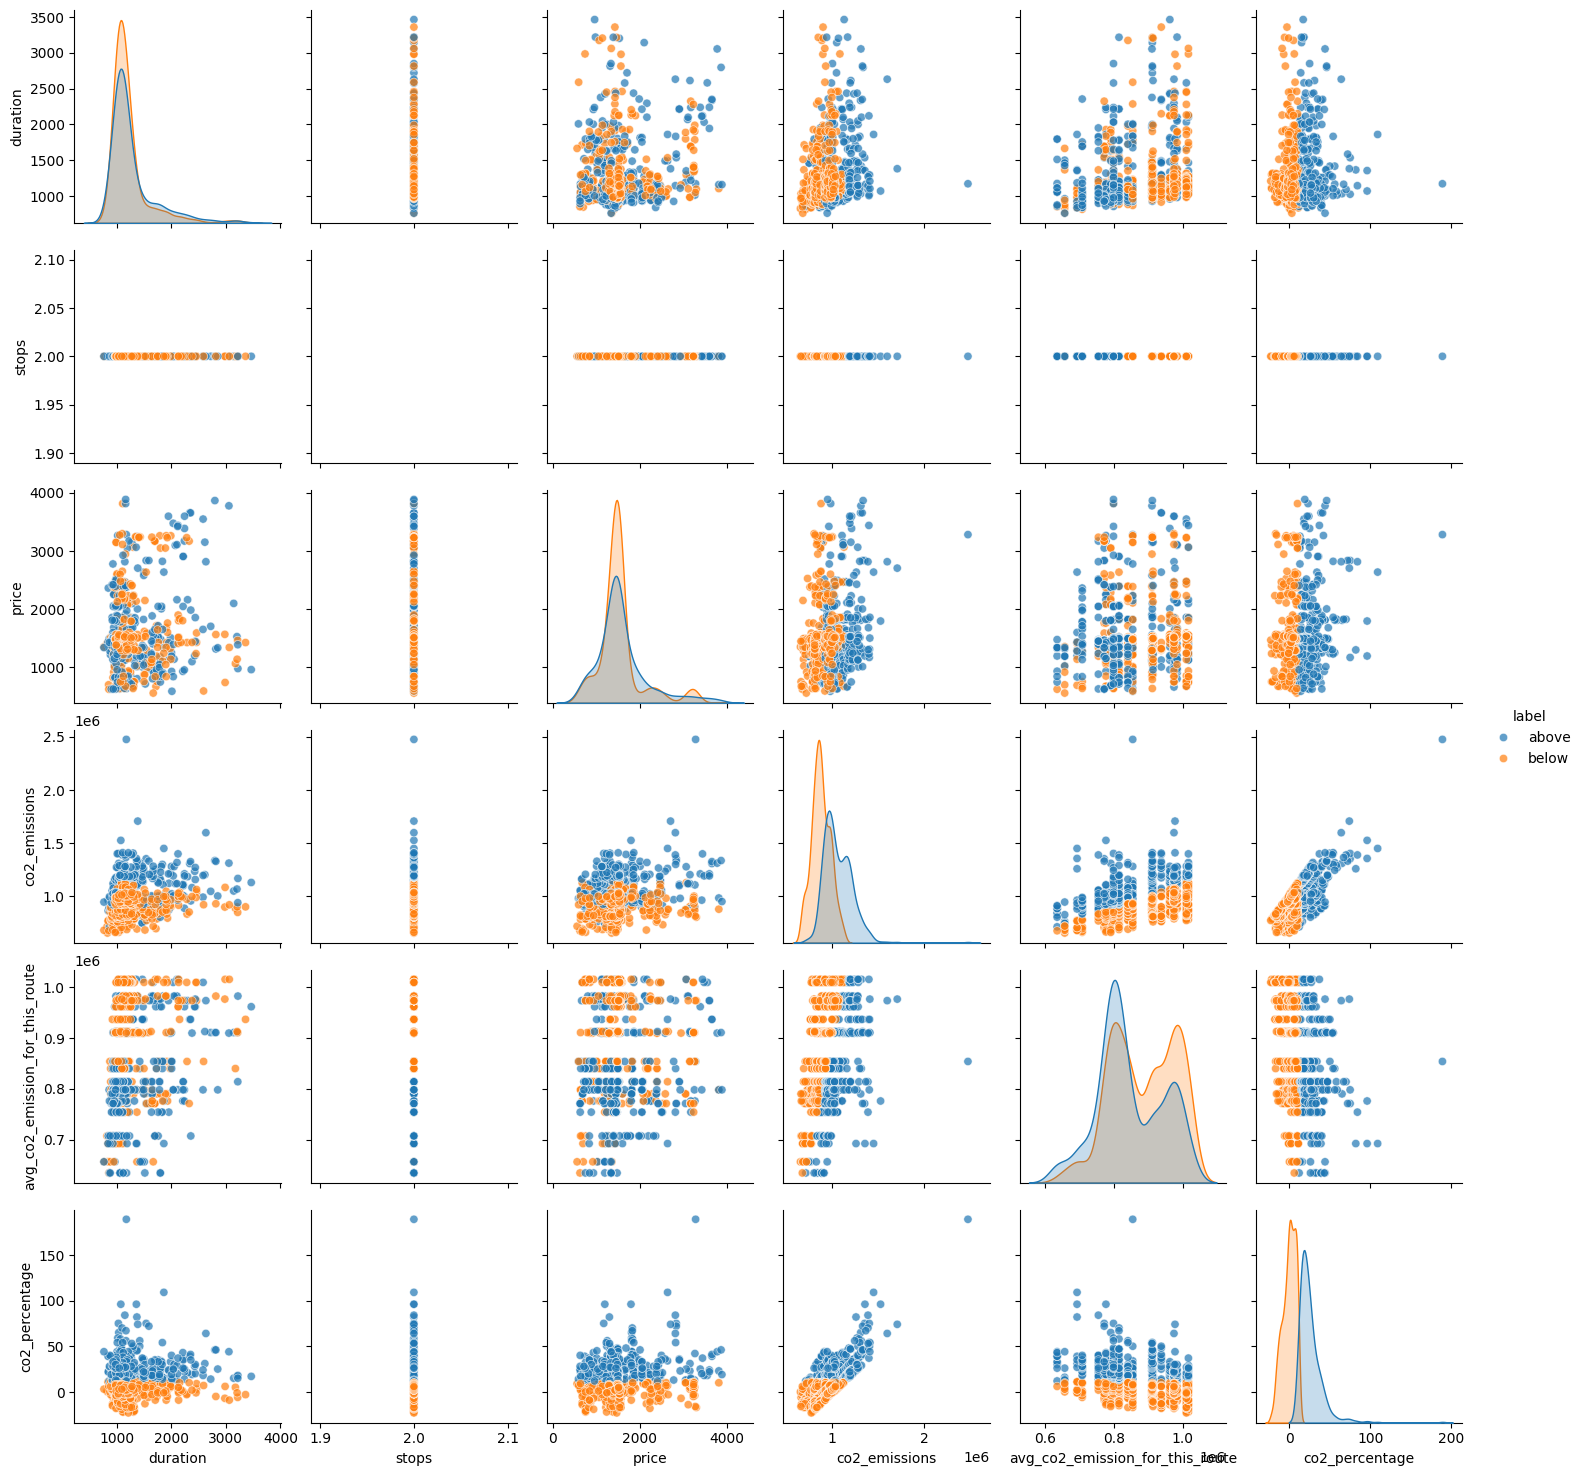

In [20]:

import seaborn as sns

features = ['duration', 'stops', 'price', 'co2_emissions', 'avg_co2_emission_for_this_route', 'co2_percentage']

sns.pairplot(
    df_ga_stop2,
    vars=features,
                 hue='label',
    #              markers=['o', 'D', '+'],
    plot_kws={"alpha": 0.7},
);

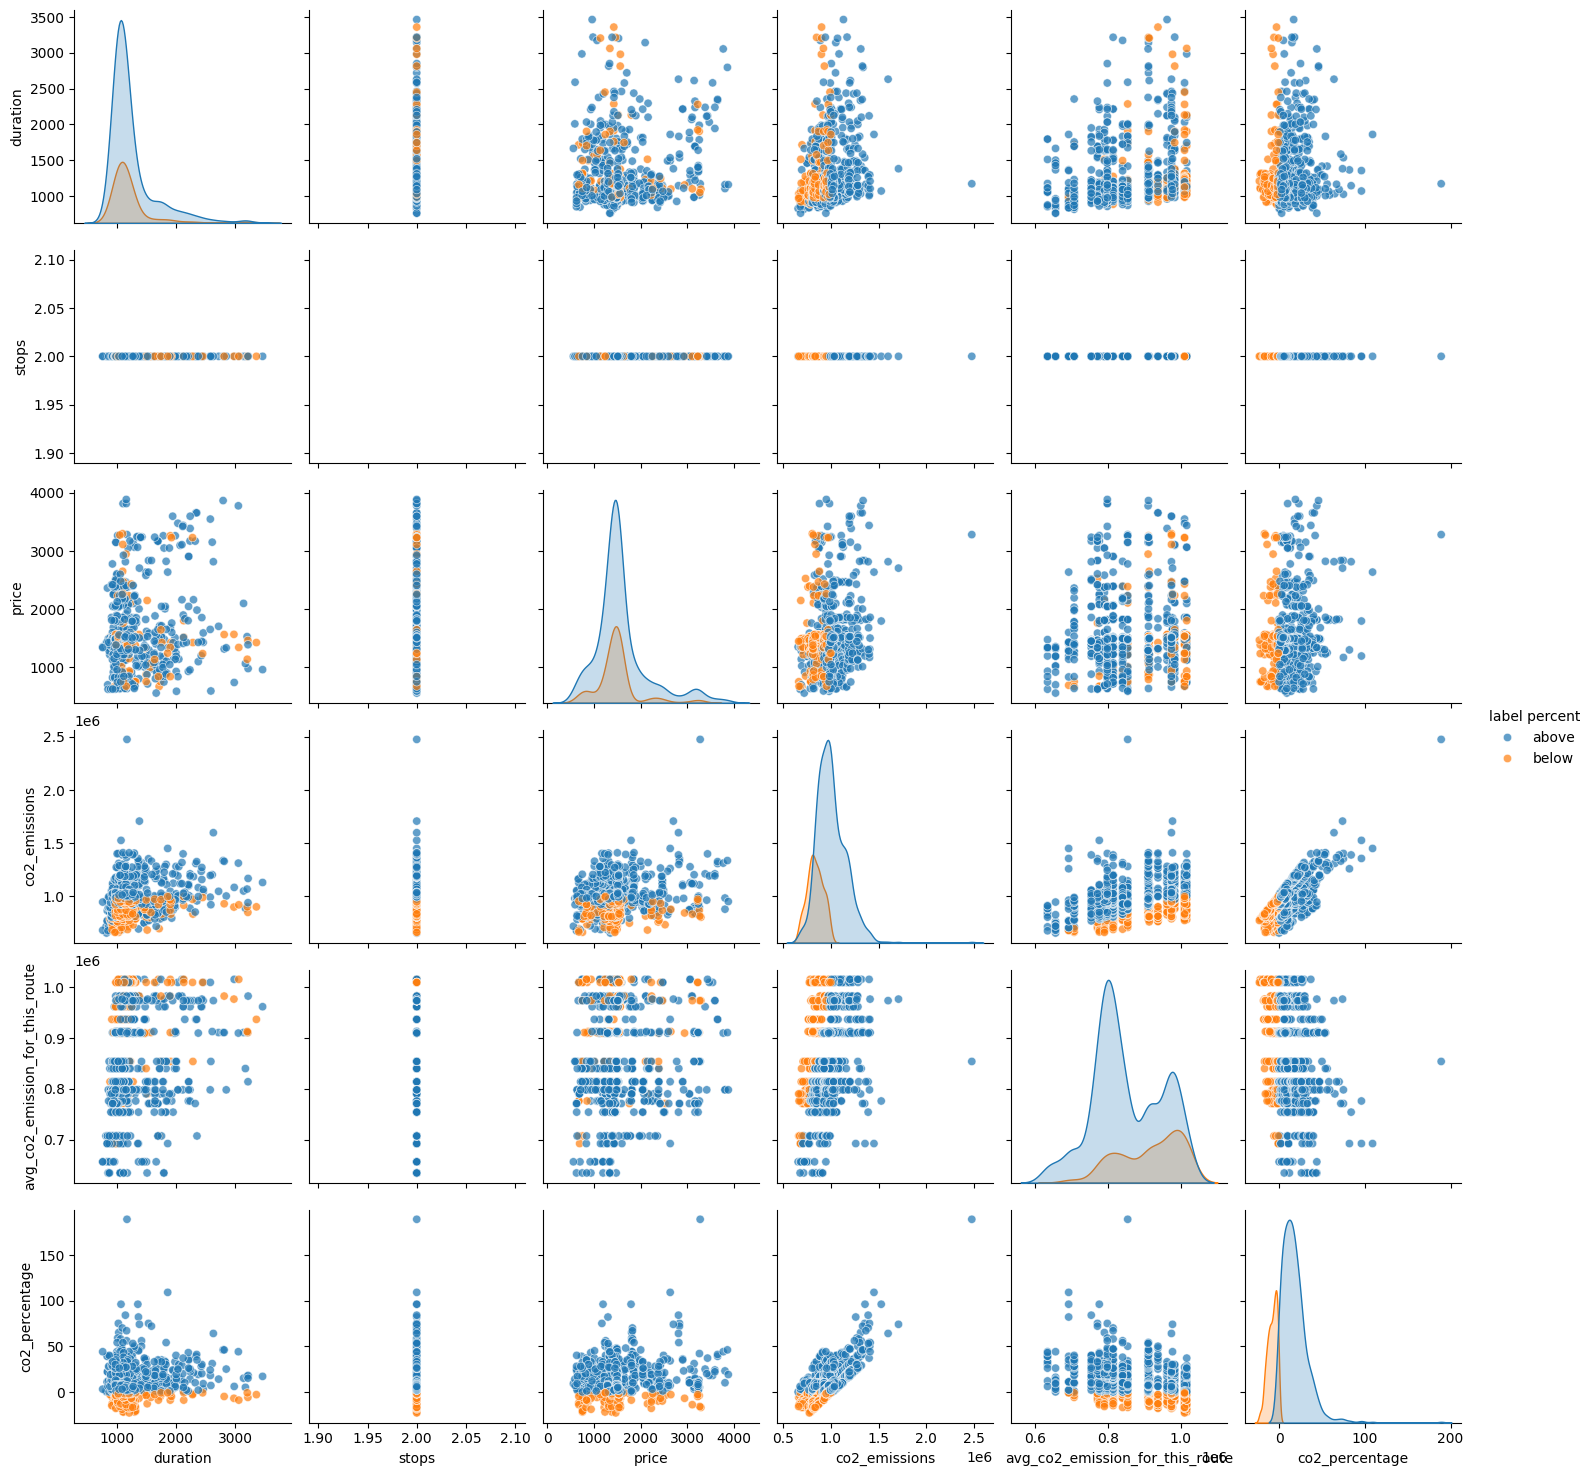

In [21]:

import seaborn as sns

features = ['duration', 'stops', 'price', 'co2_emissions', 'avg_co2_emission_for_this_route', 'co2_percentage']

sns.pairplot(
    df_ga_stop2,
    vars=features,
                 hue='label percent',
    #              markers=['o', 'D', '+'],
    plot_kws={"alpha": 0.7},
);

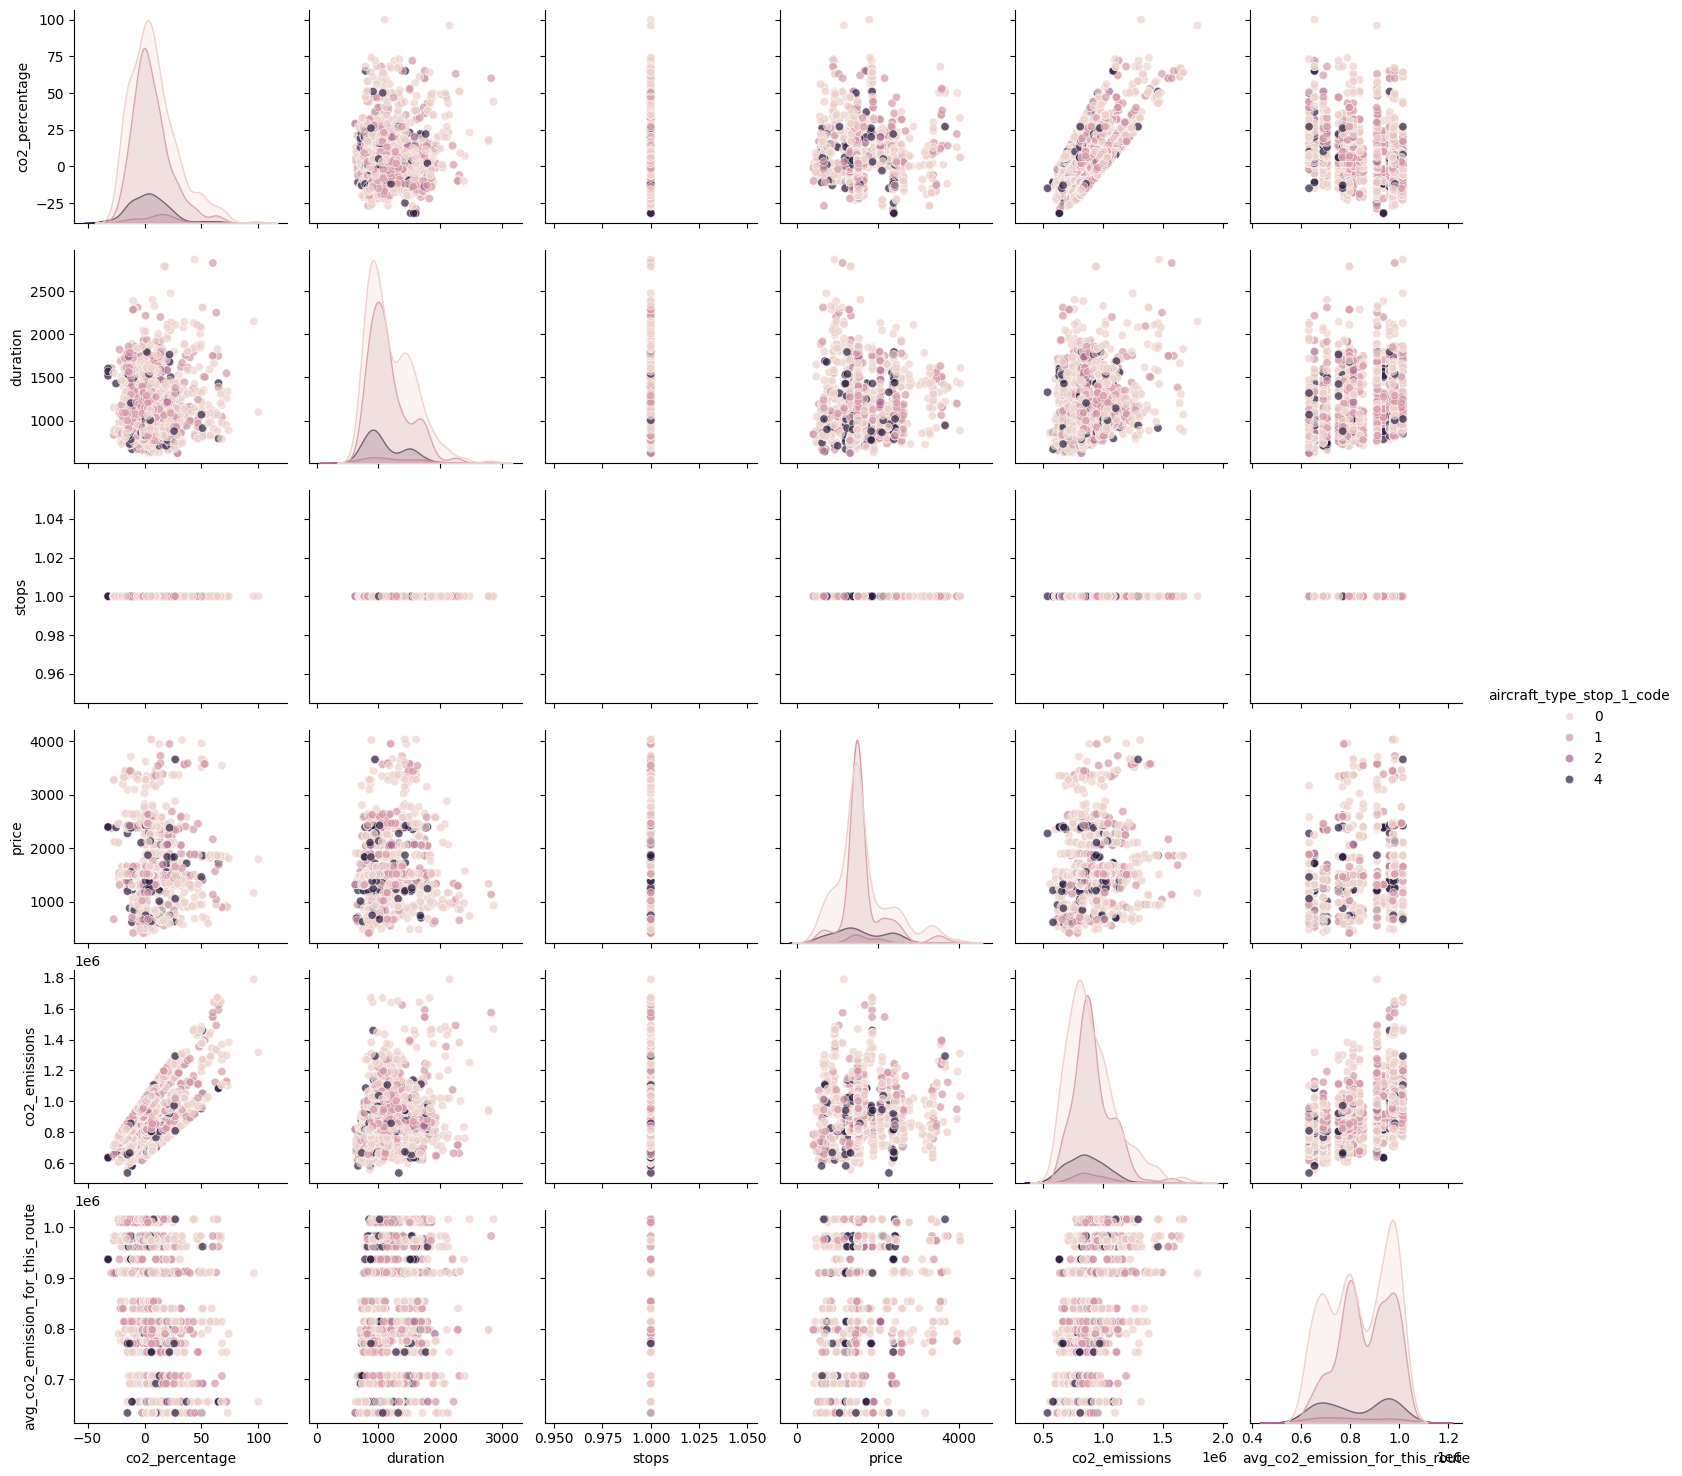

In [27]:

import seaborn as sns

features = ['co2_percentage' , 'duration', 'stops', 'price', 'co2_emissions', 'avg_co2_emission_for_this_route']

sns.pairplot(
    df_ga_stop1,
    vars=features,
                 hue='aircraft_type_stop_1_code',
    #              markers=['o', 'D', '+'],
    plot_kws={"alpha": 0.7},
);

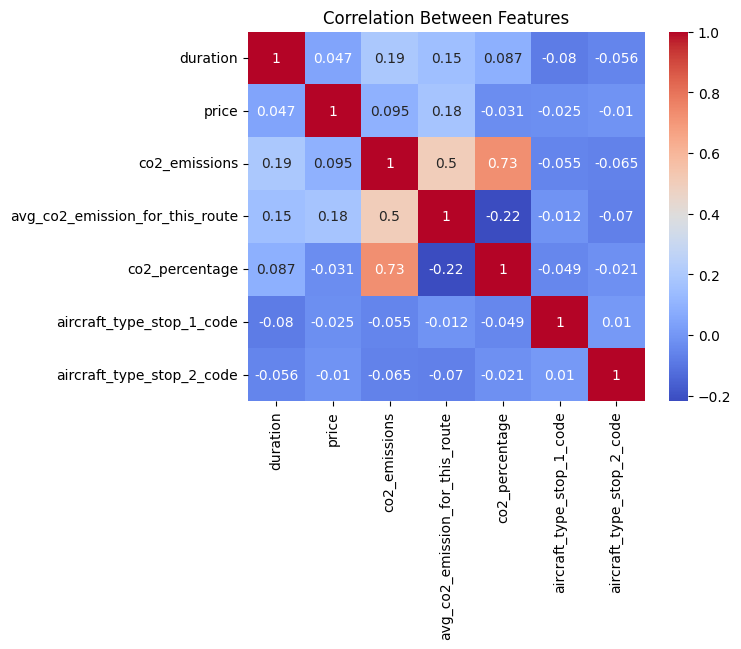

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_ga_stop1[['duration',  'price', 'co2_emissions', 'avg_co2_emission_for_this_route', 'co2_percentage' ,
                           'aircraft_type_stop_1_code', 'aircraft_type_stop_2_code']
].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()


### Model Training

Confusion Matrix:
[[ 81   0]
 [  0 246]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00       246

    accuracy                           1.00       327
   macro avg       1.00      1.00      1.00       327
weighted avg       1.00      1.00      1.00       327



c:\Users\punna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


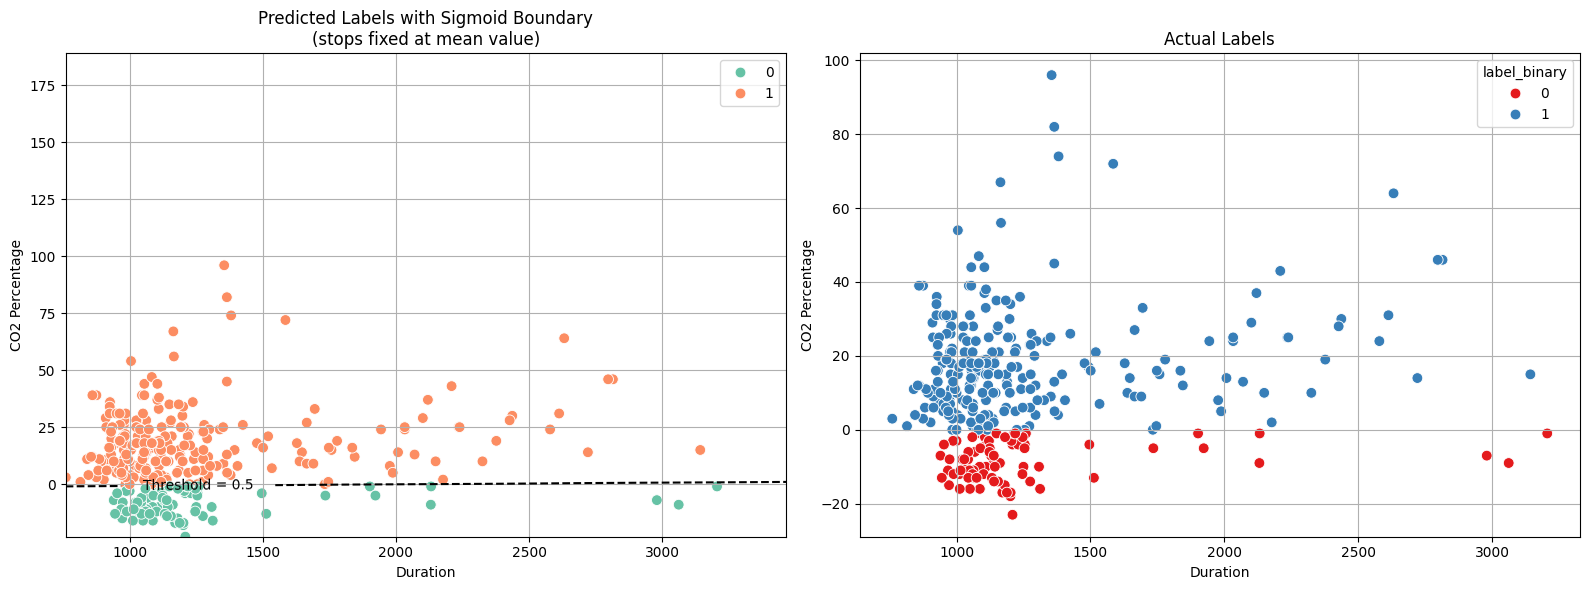

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Prepare and clean the data
df_plot = df_ga_stop2[['duration',  'stops', 'label percent', 'co2_percentage']].dropna()


# Step 3: Drop original emissions columns
df_plot = df_plot[['duration', 'co2_percentage', 'stops', 'label percent']]

# Step 4: Encode label: 'above' -> 1, 'below' -> 0
df_plot['label_binary'] = df_plot['label percent'].map({'below': 0, 'above': 1})

# Step 5: Define features and label
X = df_plot[['duration', 'co2_percentage', 'stops']]
y = df_plot['label_binary']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 8: Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 9: Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Visualization (2D plot: use duration vs co2_percentage only)
plt.figure(figsize=(16, 6))

# Plot 1: Predicted Labels
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test[''], y=X_test['co2_percentage'], hue=y_pred, palette='Set2', s=60)

# Create meshgrid (for 2D plotting, ignore 'stops')
x_min, x_max = X['duration'].min() - 0.5, X['duration'].max() + 0.5
y_min, y_max = X['co2_percentage'].min() - 0.05, X['co2_percentage'].max() + 0.05
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Use mean value of 'stops' for 2D plotting
stops_mean = X['stops'].mean()
grid = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, stops_mean)]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Contour at probability 0.5
contour = plt.contour(xx, yy, probs, levels=[0.5], colors='black', linestyles='--')
plt.clabel(contour, fmt='Threshold = 0.5', inline=True, fontsize=10)

plt.title('Predicted Labels with Sigmoid Boundary\n(stops fixed at mean value)')
plt.xlabel('Duration')
plt.ylabel('CO2 Percentage')
plt.grid(True)

# Plot 2: Actual Labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test['duration'], y=X_test['co2_percentage'], hue=y_test, palette='Set1', s=60)
plt.title('Actual Labels')
plt.xlabel('Duration')
plt.ylabel('CO2 Percentage')
plt.grid(True)

plt.tight_layout()
plt.show()
